In [18]:
import ipynb
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score
from sklearn.tree import export_text

from sklearn.preprocessing import OrdinalEncoder
from numpy import asarray
from statistics import mean

from sklearn import tree
import matplotlib.pylab as plt
from matplotlib import pyplot
from sklearn import datasets, ensemble, model_selection
from sklearn.ensemble import RandomForestClassifier

import pickle
import graphviz 

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [49]:
df = pd.read_csv("data/BEST_heart.csv", index_col=0)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
180,55,1,0,132,353,0,1,132,1,1.2,1,1,3,0
276,58,1,0,146,218,0,1,105,0,2.0,1,1,3,0
274,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
205,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
254,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,56,1,1,120,240,0,1,169,0,0.0,0,0,2,1
161,55,0,1,132,342,0,1,166,0,1.2,2,0,2,1
162,41,1,1,120,157,0,1,182,0,0.0,2,0,2,1
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [13]:
# Reseting the index
df.reset_index(drop=True, inplace=True)

features = ['trestbps','chol','thalach','oldpeak','sex','cp','fbs','restecg','exang','slope','ca','thal','age']
categorical_features = ['sex', 'cp','fbs','restecg','exang','slope','ca','thal']
target = "target"

# Convert categorical feature types
df[categorical_features] = df[categorical_features].astype('category') 
df[target] = df[target].astype('category') 

print('Revenue distribution:\n'+ str(df[target].value_counts()))

Revenue distribution:
1    165
0    165
Name: target, dtype: int64


In [5]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,55,1,0,132,353,0,1,132,1,1.2,1,1,3,0
1,58,1,0,146,218,0,1,105,0,2.0,1,1,3,0
2,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
3,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
4,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,56,1,1,120,240,0,1,169,0,0.0,0,0,2,1
326,55,0,1,132,342,0,1,166,0,1.2,2,0,2,1
327,41,1,1,120,157,0,1,182,0,0.0,2,0,2,1
328,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


# Training

Get Parameters from "ParameterTuning"

In [6]:
dt_model = DecisionTreeClassifier(criterion='gini', max_depth=9, min_samples_leaf=2, min_samples_split=3)

In [37]:
def bestModel(model, df, target):
    
    models = []
    f1s = []
    accs = []
    X_tests = []
    y_tests = []
    y_preds = []
    
    y = df[target]
    X = df.drop(columns=[target])
    
    for i in range(100):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y)
        X_tests.append(X_test)
        y_tests.append(y_test)
        
        models.append(model.fit(X_train, y_train))
        y_pred = model.predict(X_test)
        y_preds.append(y_pred)
        
        f1s.append(f1_score(y_test, y_pred, average='weighted'))
        accs.append(accuracy_score(y_test, y_pred))
    
    index_max = np.argmax(f1s)
    
    return [models[index_max], f1s[index_max], accs[index_max], X_tests[index_max], y_tests[index_max], y_preds[index_max]]
    

In [38]:
[model, f1, accuracy, X_test, y_test, y_pred] = bestModel(dt_model, df, target)

In [7]:
# Importing Existing Model

with open('results/DecisionTreeModel','rb') as inputfile:
    model = pickle.load(inputfile) 

# Feature Importance

https://towardsdatascience.com/explainable-ai-xai-with-a-decision-tree-960d60b240bd

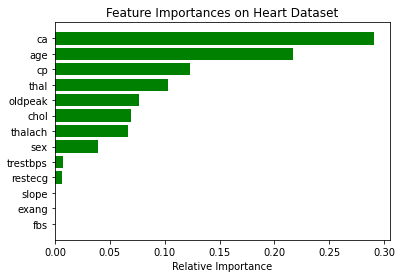

In [8]:
importances = model.feature_importances_
indices = np.argsort(importances)
features = df.columns
j = len(features)-1

plt.title('Feature Importances on Heart Dataset')
plt.barh(range(j), importances[indices][len(indices)-j:], color='g', align='center')
plt.yticks(range(j), [features[i] for i in indices[len(indices)-j:]])
plt.xlabel('Relative Importance')
plt.savefig("results/ImportanceGraph.png")
plt.show()

In [9]:
print(df.columns)
print(model.feature_importances_)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')
[0.21717131 0.03929975 0.12298797 0.00777358 0.06953765 0.
 0.00631603 0.06624365 0.         0.07673133 0.         0.29058118
 0.10335754]


# Visualization

https://towardsdatascience.com/explainable-ai-xai-with-a-decision-tree-960d60b240bd

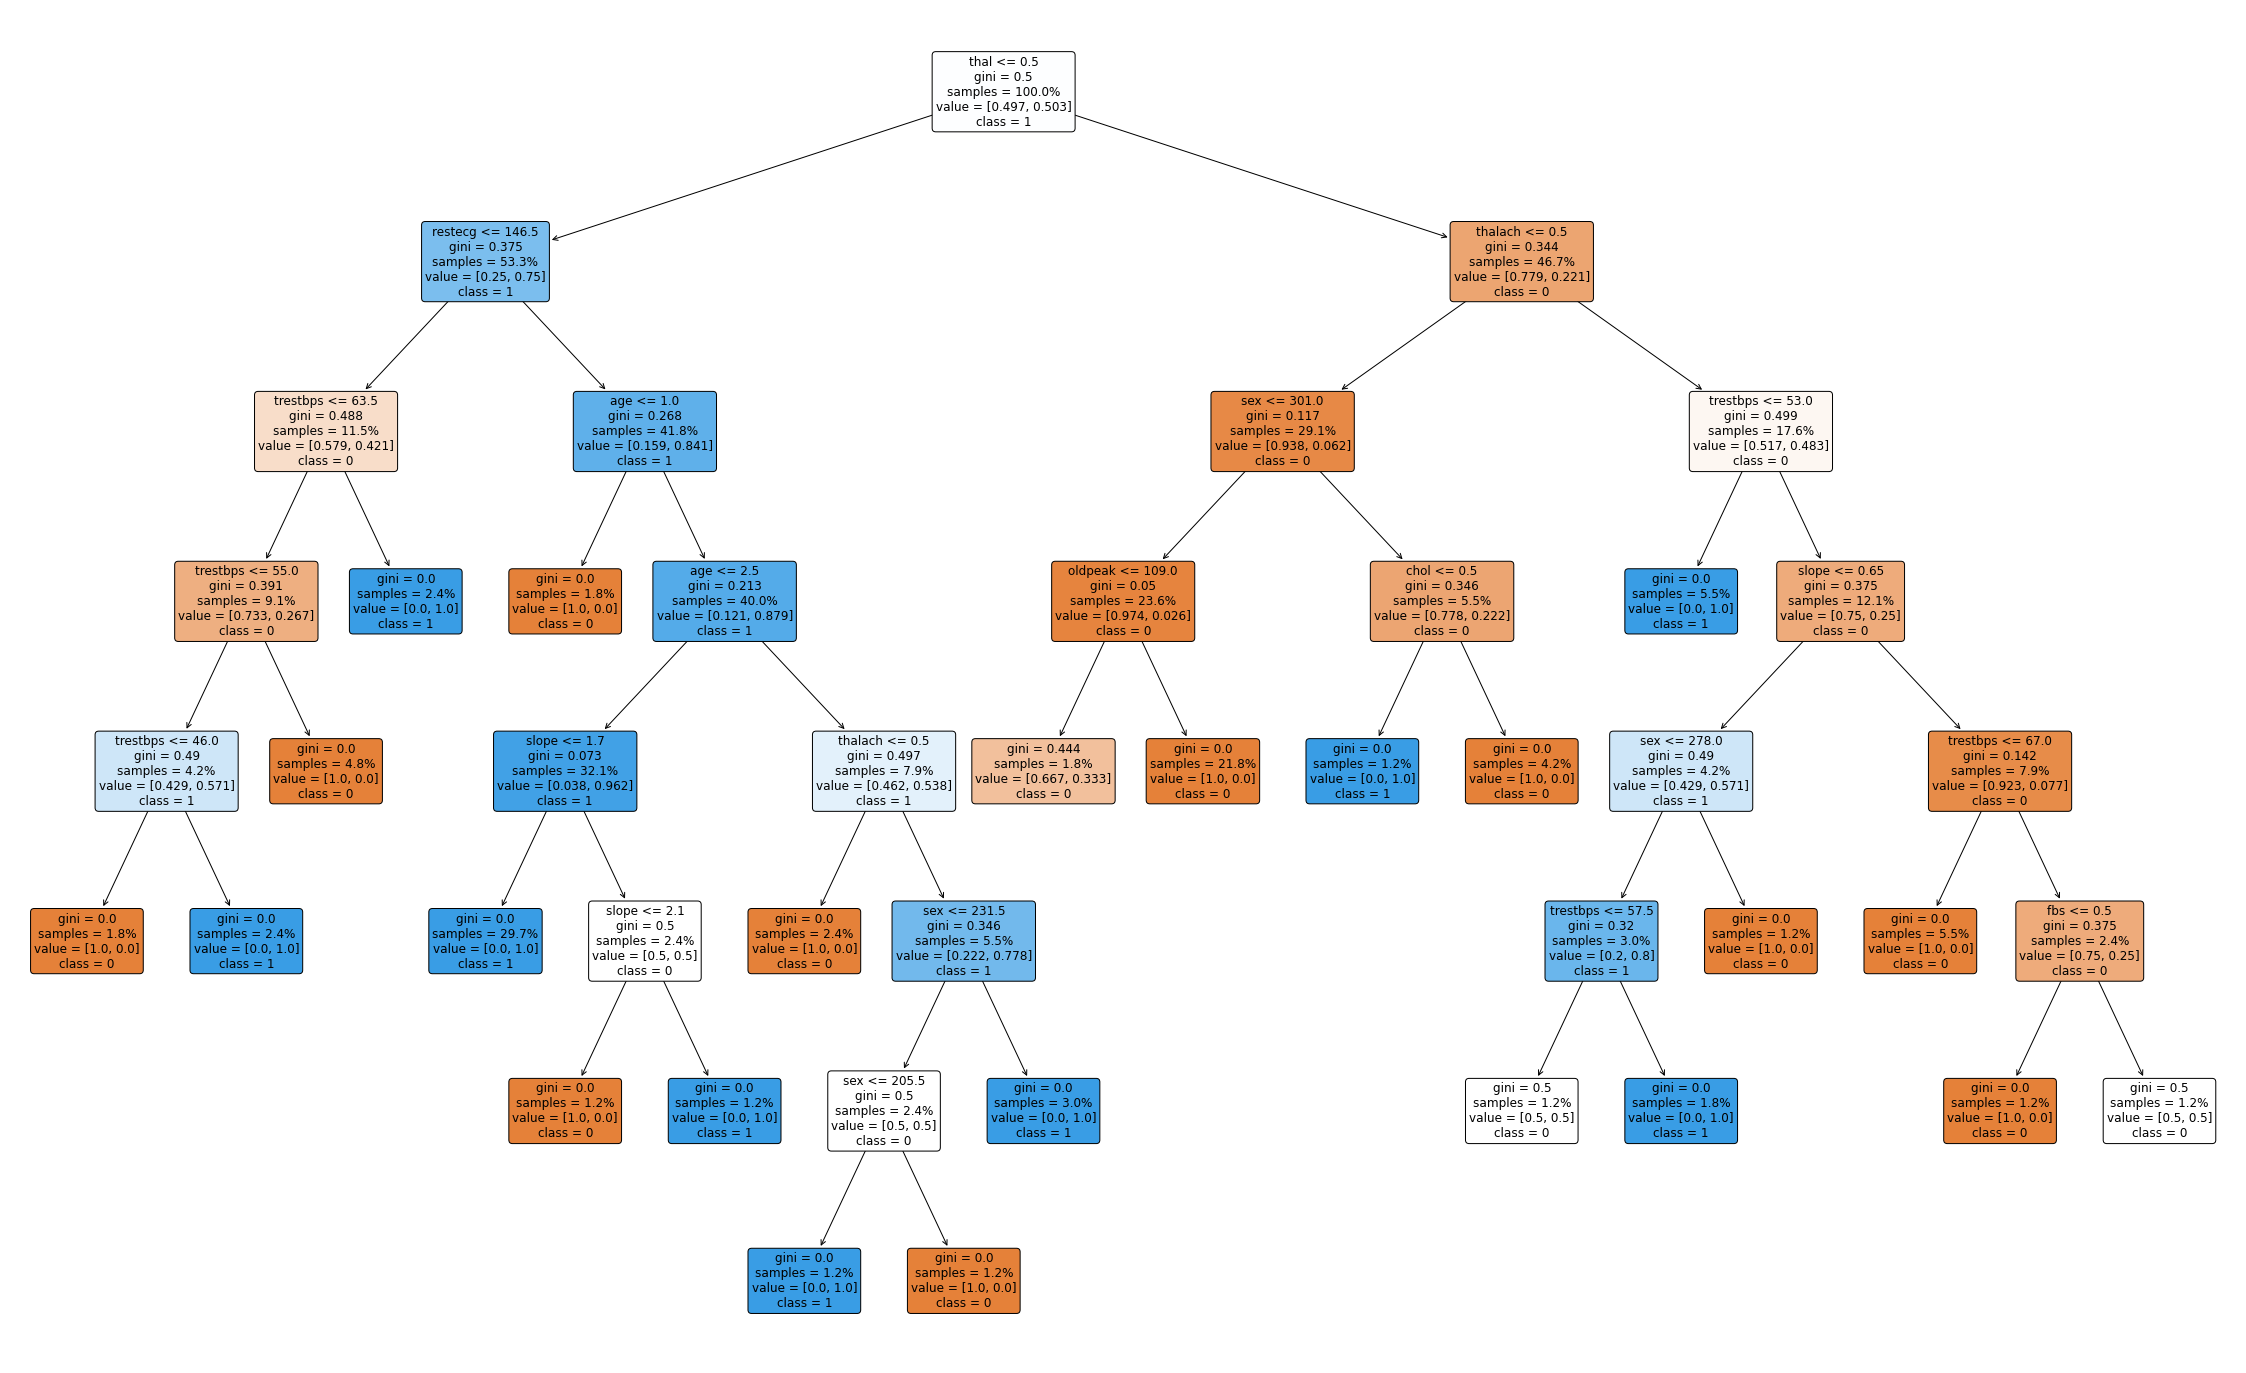

In [19]:

fig = plt.figure(figsize=(40,25))
vis = tree.plot_tree(model, feature_names = features, class_names = ['0', '1'], fontsize=12, proportion=True, filled=True, rounded=True)
fig.savefig('results/DecisionTree_Proportions.png')

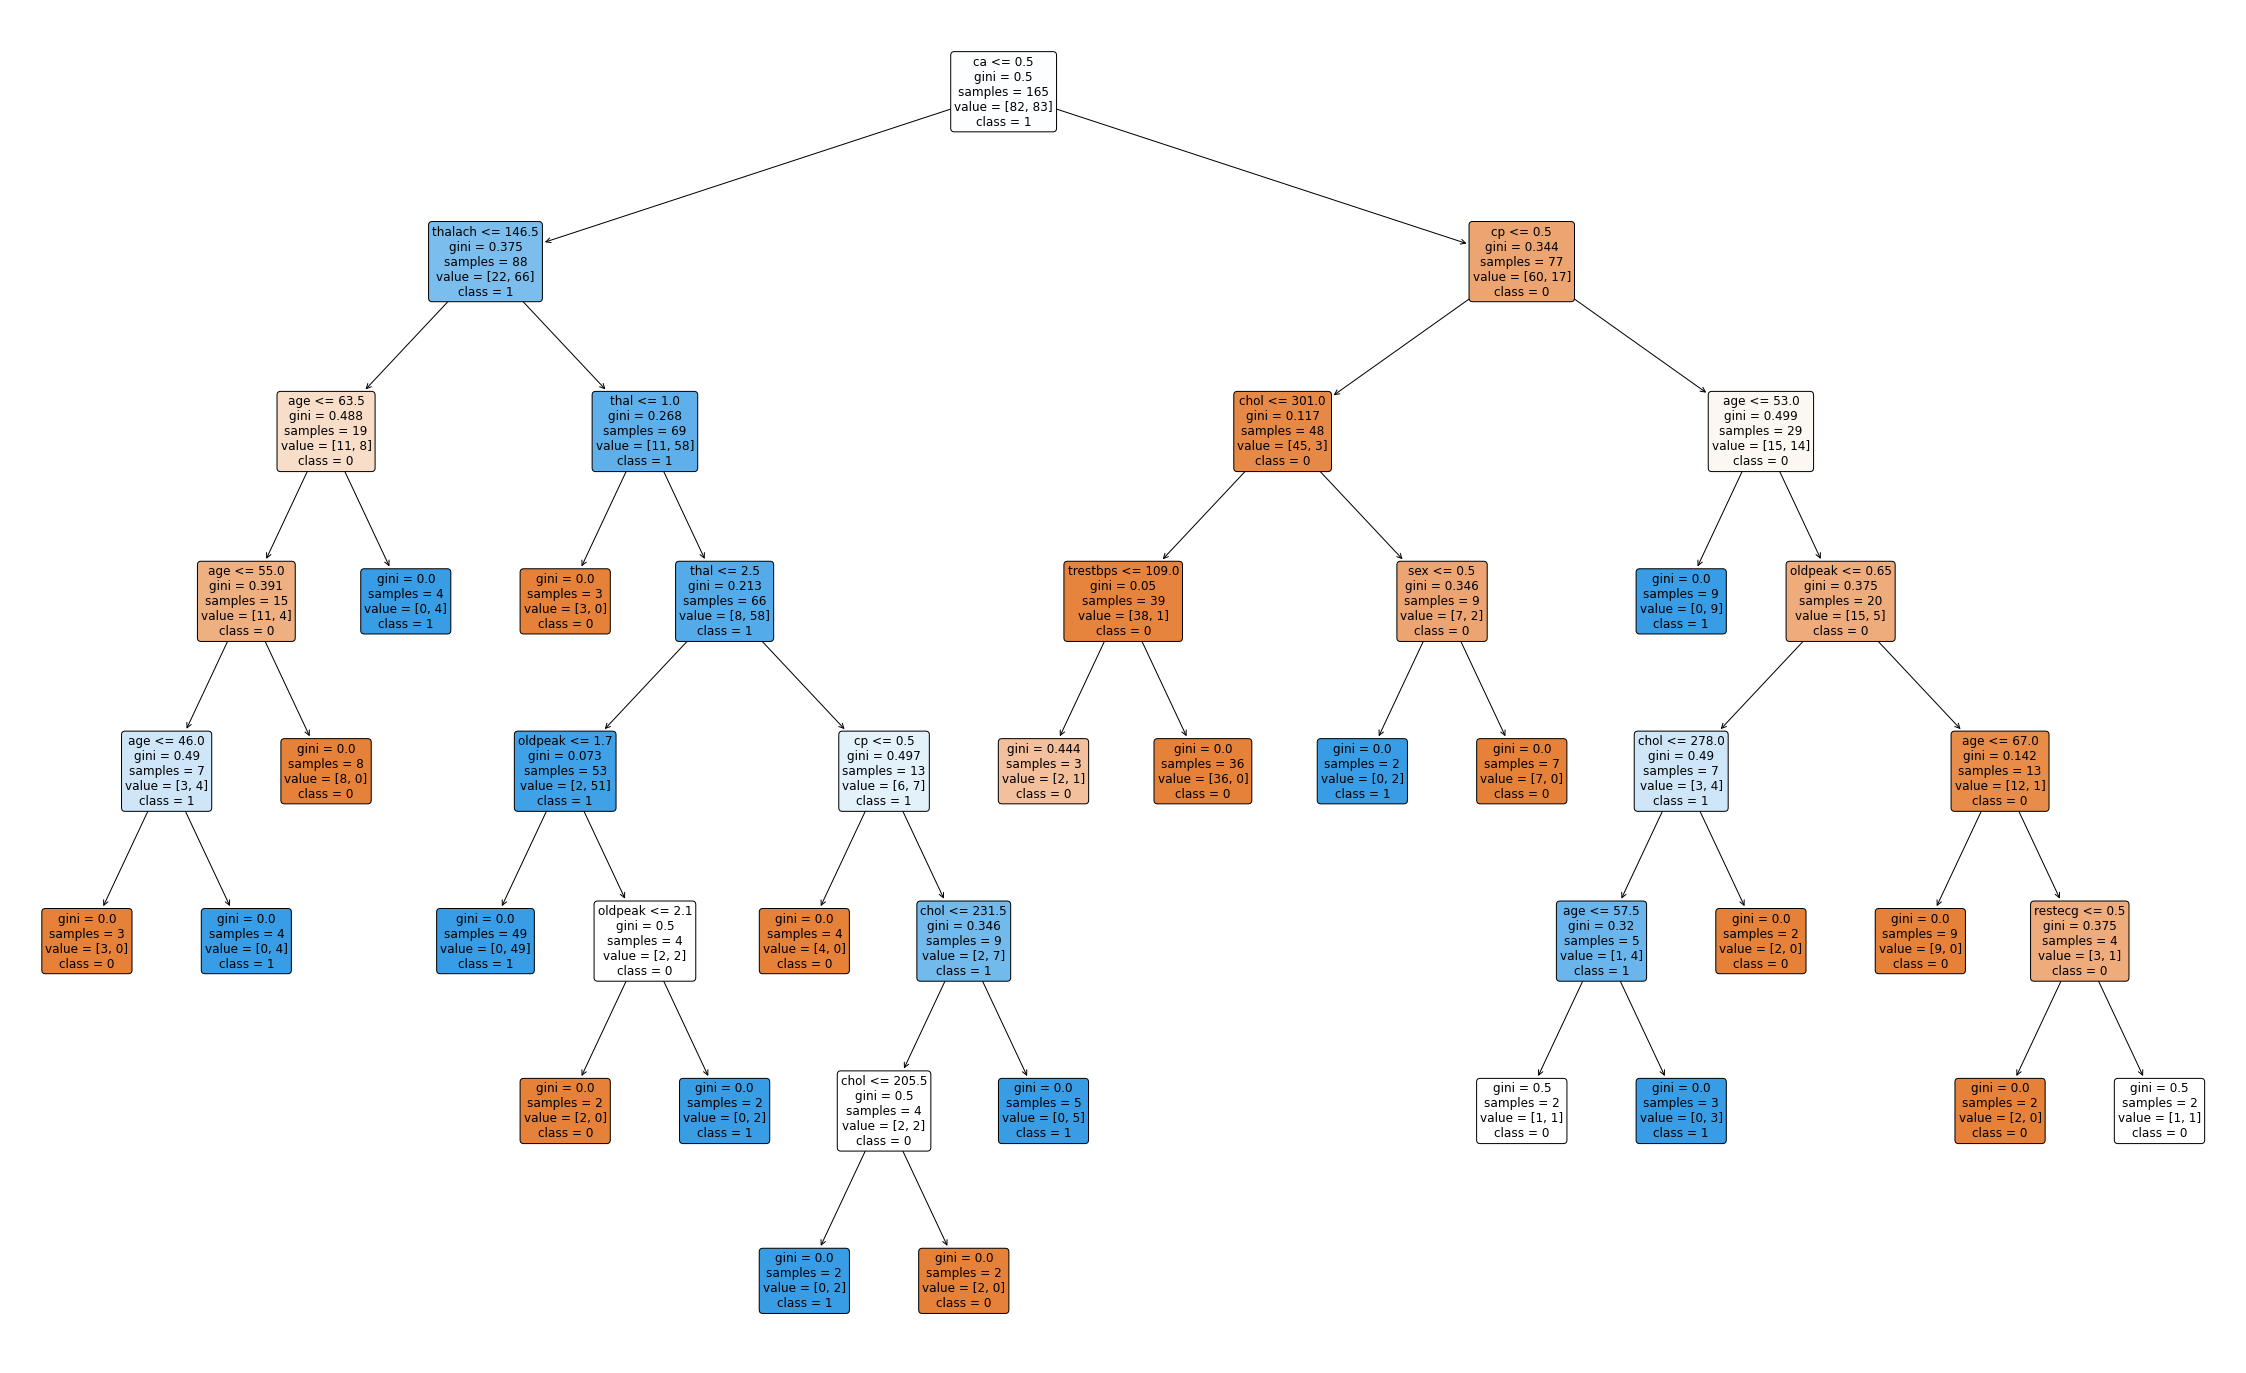

In [11]:
# visualization
fig = plt.figure(figsize=(40,25))
vis = tree.plot_tree(model, feature_names = features, class_names = ['0', '1'], fontsize=12, filled=True, rounded=True)
fig.savefig('results/DecisionTree.png')

https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_text.html

In [14]:
r = export_text(model, feature_names=features)
print(r)

f = open("results/DecisionTreeText.txt", "w")
print(r, file=f)
f.close()

|--- thal <= 0.50
|   |--- restecg <= 146.50
|   |   |--- trestbps <= 63.50
|   |   |   |--- trestbps <= 55.00
|   |   |   |   |--- trestbps <= 46.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- trestbps >  46.00
|   |   |   |   |   |--- class: 1
|   |   |   |--- trestbps >  55.00
|   |   |   |   |--- class: 0
|   |   |--- trestbps >  63.50
|   |   |   |--- class: 1
|   |--- restecg >  146.50
|   |   |--- age <= 1.00
|   |   |   |--- class: 0
|   |   |--- age >  1.00
|   |   |   |--- age <= 2.50
|   |   |   |   |--- slope <= 1.70
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- slope >  1.70
|   |   |   |   |   |--- slope <= 2.10
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- slope >  2.10
|   |   |   |   |   |   |--- class: 1
|   |   |   |--- age >  2.50
|   |   |   |   |--- thalach <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- thalach >  0.50
|   |   |   |   |   |--- sex <= 231.50
|   |   |   |   |   |   |--- sex <= 205.50
|   |   |   

https://scikit-learn.org/stable/modules/tree.html#classification

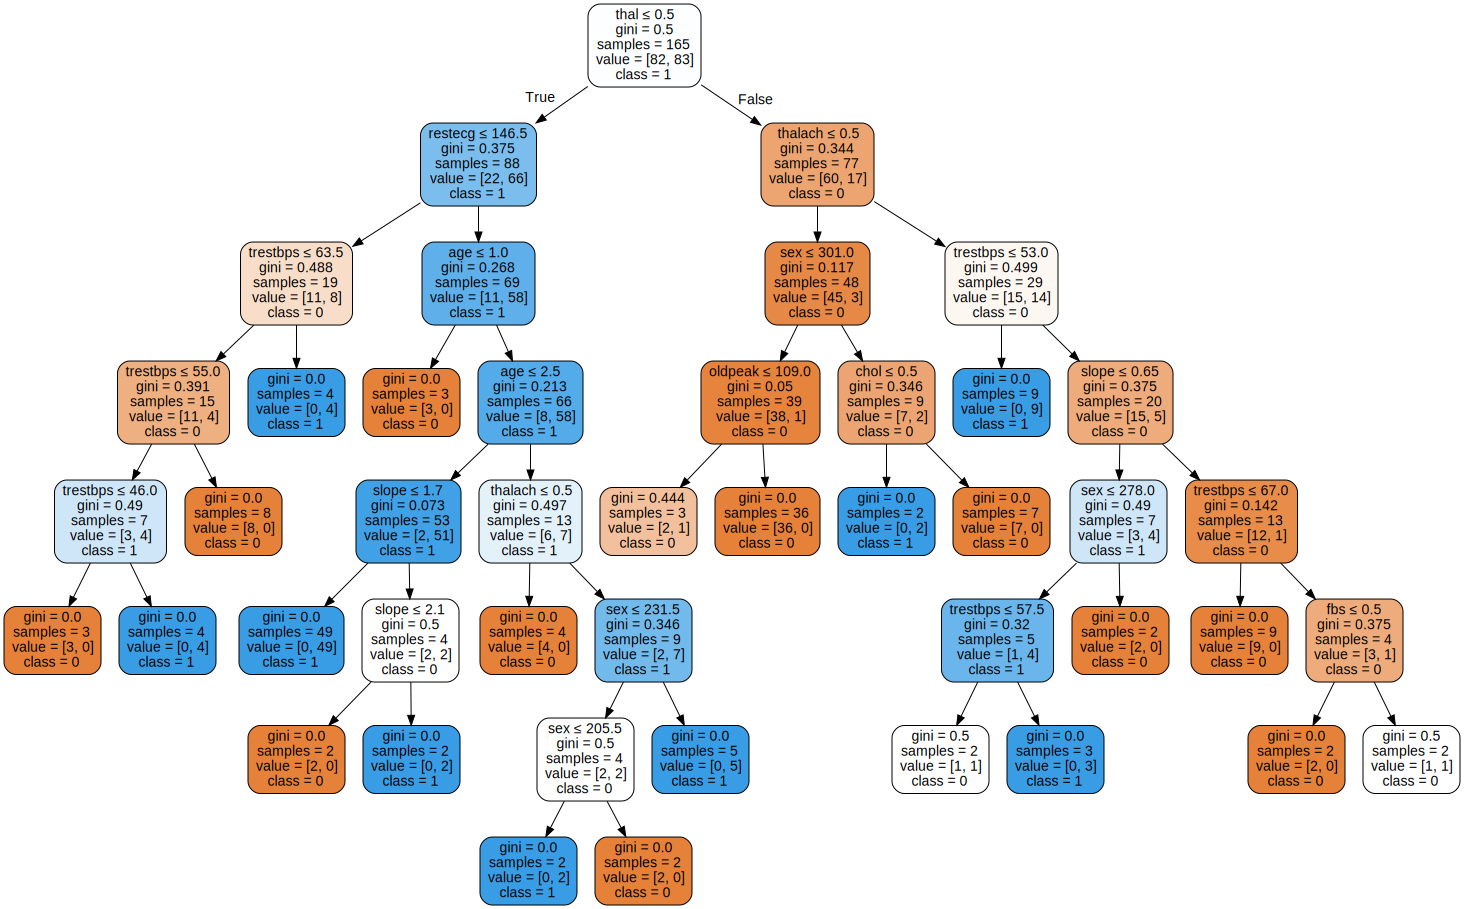

In [32]:
dot_data = tree.export_graphviz(model, out_file=None, feature_names=features,  
                                class_names = ['0', '1'], filled=True, rounded=True, special_characters=True)  
graph = graphviz.Source(dot_data)  
#graph.render(filename='Graphviz')

graph

# Morgue

https://hackernoon.com/how-to-plot-a-decision-boundary-for-machine-learning-algorithms-in-python-3o1n3w07

In [77]:
# Feature Pairs
features_combinations = []

for mod1 in features:
    for mod2 in features:
        if mod1 != mod2 and not ((mod2,mod1) in features_combinations):
            features_combinations.append([mod1,mod2])
            
print(features_combinations)
print(len(features_combinations))

[['trestbps', 'chol'], ['trestbps', 'thalach'], ['trestbps', 'oldpeak'], ['trestbps', 'sex'], ['trestbps', 'cp'], ['trestbps', 'fbs'], ['trestbps', 'restecg'], ['trestbps', 'exang'], ['trestbps', 'slope'], ['trestbps', 'ca'], ['trestbps', 'thal'], ['trestbps', 'age'], ['chol', 'trestbps'], ['chol', 'thalach'], ['chol', 'oldpeak'], ['chol', 'sex'], ['chol', 'cp'], ['chol', 'fbs'], ['chol', 'restecg'], ['chol', 'exang'], ['chol', 'slope'], ['chol', 'ca'], ['chol', 'thal'], ['chol', 'age'], ['thalach', 'trestbps'], ['thalach', 'chol'], ['thalach', 'oldpeak'], ['thalach', 'sex'], ['thalach', 'cp'], ['thalach', 'fbs'], ['thalach', 'restecg'], ['thalach', 'exang'], ['thalach', 'slope'], ['thalach', 'ca'], ['thalach', 'thal'], ['thalach', 'age'], ['oldpeak', 'trestbps'], ['oldpeak', 'chol'], ['oldpeak', 'thalach'], ['oldpeak', 'sex'], ['oldpeak', 'cp'], ['oldpeak', 'fbs'], ['oldpeak', 'restecg'], ['oldpeak', 'exang'], ['oldpeak', 'slope'], ['oldpeak', 'ca'], ['oldpeak', 'thal'], ['oldpeak', '

In [86]:
def DecisionBoundary(pair):
    
    # Parameters
    n_classes = 2
    plot_colors = "ryb"
    plot_step = 0.5
    pairidx = 0

    # We only take the two corresponding features
    X = df[pair].to_numpy()
    y = df.target.to_numpy()

    # Train
    clf = dt_model.fit(X, y)

    # Plot the decision boundary
    plt.subplot(1, 1, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                             np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(pair[0])
    plt.ylabel(pair[1])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color,
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

    plt.suptitle("Decision surface of a decision tree using paired features")
    plt.legend(loc='lower right', borderpad=0, handletextpad=0)
    plt.axis("tight")
    plt.savefig('results/decisionBoundaries/DecisionBoundary_'+pair[0]+'_'+pair[1]+'.png')

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles wi

KeyboardInterrupt: 

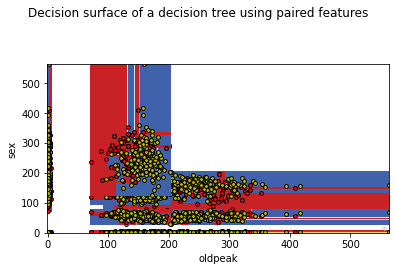

In [87]:
for feat in features_combinations:
    DecisionBoundary(feat)

# Exporting Model

In [101]:
# Exporting Model using Pickle File

# dump information to that file
with open('results/DecisionTreeModel','wb') as outfile:
    pickle.dump(model, outfile)
 


# To Importing Model
#  with open('DecisionTreeModel','rb') as inputfile:
#    modell = pickle.load(inputfile) 
